<a href="https://colab.research.google.com/github/Geethanjali2608/Recipes-Recommender/blob/master/BalanceSMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown  1DjqiHpEHkCyJb38tn_M7q2zwQqtWJikW

Downloading...
From: https://drive.google.com/uc?id=1DjqiHpEHkCyJb38tn_M7q2zwQqtWJikW
To: /content/CTG.csv
100% 287k/287k [00:00<00:00, 28.0MB/s]


In [ ]:
import numpy as np
import pandas as pd
#this is for importing SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/CTG.csv')
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


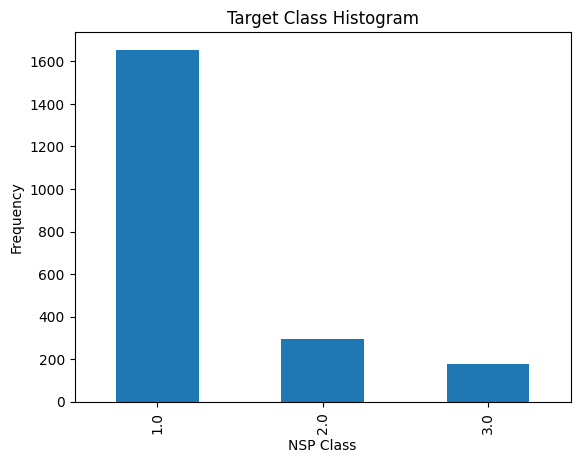

,count
NSP,
normal,1655
suspect,295
pathological,176


In [ ]:
df['NSP'].value_counts().plot.bar()
plt.title('Target Class Histogram')
plt.xlabel('NSP Class')
plt.ylabel('Frequency')
plt.show()
df['NSP'] = df['NSP'].replace({1: 'normal', 2: 'suspect', 3: 'pathological'})
df['NSP'].value_counts()

In [ ]:
df=df.drop(["FileName","Date","SegFile","b","e"],axis=1)

In [ ]:
df.shape

(2129, 35)

In [ ]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
LBE,3,0.14
LB,3,0.14
AC,3,0.14
FM,2,0.09
UC,2,0.09
ASTV,2,0.09
MSTV,2,0.09
ALTV,2,0.09
MLTV,2,0.09
DL,1,0.05


In [ ]:
df.isnull().sum()

,0
LBE,3
LB,3
AC,3
FM,2
UC,2
ASTV,2
MSTV,2
ALTV,2
MLTV,2
DL,1


In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2126 entries, 0 to 2125
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2126 non-null   float64
 4   UC        2126 non-null   float64
 5   ASTV      2126 non-null   float64
 6   MSTV      2126 non-null   float64
 7   ALTV      2126 non-null   float64
 8   MLTV      2126 non-null   float64
 9   DL        2126 non-null   float64
 10  DS        2126 non-null   float64
 11  DP        2126 non-null   float64
 12  DR        2126 non-null   float64
 13  Width     2126 non-null   float64
 14  Min       2126 non-null   float64
 15  Max       2126 non-null   float64
 16  Nmax      2126 non-null   float64
 17  Nzeros    2126 non-null   float64
 18  Mode      2126 non-null   float64
 19  Mean      2126 non-null   float64
 20  Median    2126 non-null   float64
 

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
df['NSP'] = df['NSP'].replace({'normal': 1, 'suspect': 2, 'pathological': 3})

<ipython-input-11-79e9efc82d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NSP'] = df['NSP'].replace({'normal': 1, 'suspect': 2, 'pathological': 3})


In [ ]:
numerical_vars =  df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars =  df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']
Categorical variables: ['NSP']


In [ ]:
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1


In [ ]:
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 1
Number of numerical variables: 34


In [ ]:
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
LBE,0,0.0
LB,0,0.0
AC,0,0.0
FM,0,0.0
UC,0,0.0
ASTV,0,0.0
MSTV,0,0.0
ALTV,0,0.0
MLTV,0,0.0
DL,0,0.0


In [ ]:
df.describe(include="all")

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1655.0
mean,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,NaN
std,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,NaN
min,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
50%,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,NaN
75%,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.30,9.84,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.30,9.84,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.72,3.56,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.24,37.13,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.66,2.85,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.99,17.19,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.33,0.88,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.85,18.40,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.19,5.63,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.57,2.50,0.0,0.0,0.0,3.0,16.0


In [ ]:
df[df.duplicated(keep=False)]

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
67,140.0,140.0,5.0,0.0,3.0,34.0,1.2,0.0,10.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
68,140.0,140.0,5.0,0.0,3.0,34.0,1.2,0.0,10.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
229,123.0,123.0,3.0,4.0,0.0,52.0,0.8,2.0,15.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
233,123.0,123.0,0.0,0.0,0.0,49.0,0.8,7.0,13.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
234,123.0,123.0,0.0,0.0,0.0,49.0,0.8,7.0,13.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
304,145.0,145.0,0.0,13.0,0.0,77.0,0.2,45.0,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2
306,145.0,145.0,0.0,13.0,0.0,77.0,0.2,45.0,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2
317,150.0,150.0,0.0,10.0,0.0,79.0,0.2,84.0,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3
319,150.0,150.0,0.0,10.0,0.0,79.0,0.2,84.0,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3
323,135.0,135.0,0.0,0.0,0.0,62.0,0.5,71.0,6.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3


In [ ]:
df=df.drop_duplicates()
df.shape

(2114, 35)

In [ ]:
X=df.drop(["NSP"],axis=1)
y=df["NSP"]
y = y.astype(int)

In [ ]:
print("Original class distribution:", Counter(y))

Original class distribution: Counter({1: 1648, 2: 292, 3: 174})


In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({2: 1648, 1: 1648, 3: 1648})


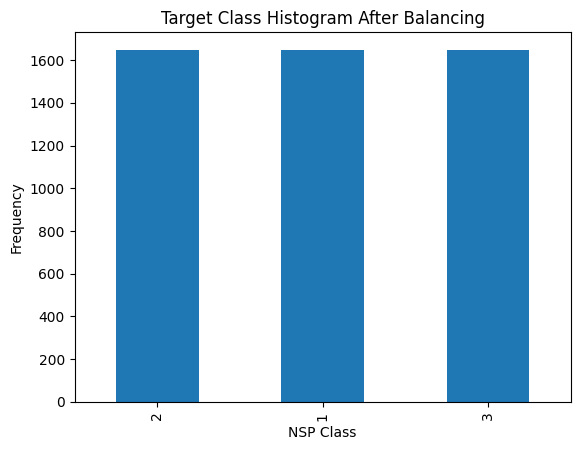

In [ ]:
y_resampled.value_counts().plot.bar()
plt.title('Target Class Histogram After Balancing')
plt.xlabel('NSP Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X_resampled)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_clf=SVC(kernel="poly",degree=6,coef0=5,gamma=0.9)
svm_clf=svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

98.24797843665768